In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
row_train = pd.read_csv('train.csv', sep=',')
row_val = pd.read_csv('validation.csv', sep=',')
row_test = pd.read_csv('test.csv', sep=',')


# DATA EXPLORATION

In [3]:
display(row_train.describe())
display(row_test.head())
print(row_train.shape)

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.381152e+06,0.0,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.888556e+00,1.348925e+01,1.493833e+02,1.543295e+02,2.109685e+00,NaN,5.774218e+02,1.885723e+02,2.671783e+01,2.729620e+02,7.815142e+01,2.840736e+03
std,2.714809e-02,2.055223e+00,6.567105e+00,1.020631e+02,1.033093e+02,8.764370e-01,NaN,3.216738e+02,1.314946e+02,3.704444e+01,2.891153e+01,5.984636e+01,7.841990e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,1.000000e+00,NaN,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,2.000000e+00,NaN,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.800000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,3.000000e+00,NaN,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,9.900000e+01,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,4.000000e+00,NaN,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,75045dd2f2136c93fe55fe6c446ec1527ed8f0bb,windows_chrome,27.197.36.*,146,159,3.0,DDTSQuf0MTTNaqKIvMpENpn,...,Astro_F_Rectangle,300,250,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304..."
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,11279eb1f8f7a88f877db911673522b6ff202aa7,android_safari,124.126.227.*,1,1,NaN,d63d96468f66986d5a8eb5225ad0b6f0,...,2745306850,320,50,FirstView,Na,5,11908,NaN,2997,NaN
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,4771a819a3f5b86776d8a9456f4f2506578f78d8,windows_ie,116.116.104.*,27,34,1.0,trqRTJkrBoq7JsNr5SqfNX,...,mm_34022157_3445226_11175100,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008..."
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,5360671379f3204afa9cc0edd8fd2e2096cb09eb,windows_ie,115.46.145.*,238,245,4.0,6d27caf5a202ec085f80af7163ef7cb0,...,210842,960,90,FirstView,Na,30,10717,NaN,2821,"10075,13042,10006,10110,13776,10031,10063"
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,d791b5f6306b9d299f81daa5448ced7e5bfa010f,windows_ie,221.199.203.*,27,35,3.0,3FKElpuEMusyJqKbuKz,...,Fashion_F_Rectangle,300,250,0,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063


(2430981, 25)


In [17]:
print(row_train.shape)
print(row_val.shape)
print(row_test.shape)
print(row_train.columns.values)

display(len(row_train.weekday.unique()))
display(len(row_train.hour.unique()))
display(len(row_train.bidid.unique()))
display(len(row_train.userid.unique()))
display(len(row_train.useragent.unique()))
display(len(row_train.IP.unique()))
display(len(row_train.region.unique()))
display(len(row_train.city.unique()))
display(len(row_train.adexchange.unique()))
display(len(row_train.domain.unique()))
display(len(row_train.url.unique()))
display(len(row_train.urlid.unique()))
display(len(row_train.slotid.unique()))
display(len(row_train.slotwidth.unique()))
display(len(row_train.slotheight.unique()))
display(len(row_train.slotvisibility.unique()))
display(len(row_train.slotformat.unique()))
display(len(row_train.slotprice.unique()))
display(len(row_train.creative.unique()))
display(len(row_train.bidprice.unique()))
display(len(row_train.payprice.unique()))
display(len(row_train.keypage.unique()))
display(len(row_train.advertiser.unique()))
display(len(row_train.usertag.unique()))

(2430981, 25)
(303925, 25)
(303375, 22)
['click' 'weekday' 'hour' 'bidid' 'userid' 'useragent' 'IP' 'region'
 'city' 'adexchange' 'domain' 'url' 'urlid' 'slotid' 'slotwidth'
 'slotheight' 'slotvisibility' 'slotformat' 'slotprice' 'creative'
 'bidprice' 'payprice' 'keypage' 'advertiser' 'usertag']


7

24

2430981

2342677

38

503975

35

370

5

23013

763961

1

52283

21

14

11

4

286

131

8

301

19

9

744036

In [18]:
print(row_test.columns.values)


['weekday' 'hour' 'bidid' 'userid' 'useragent' 'IP' 'region' 'city'
 'adexchange' 'domain' 'url' 'urlid' 'slotid' 'slotwidth' 'slotheight'
 'slotvisibility' 'slotformat' 'slotprice' 'creative' 'keypage'
 'advertiser' 'usertag']


In [3]:
print(row_train[(row_train['payprice']==0) & (row_train['click']==1)])

a = row_train[(row_train['payprice']==0.0000)]
#a.to_csv('D:/Web Economics/paypricezeros.csv')
print(type(row_train['payprice'][7526]))
b = row_train[row_train['bidprice']<row_train['payprice']]
display(row_train)

Empty DataFrame
Columns: [click, weekday, hour, bidid, userid, useragent, IP, region, city, adexchange, domain, url, urlid, slotid, slotwidth, slotheight, slotvisibility, slotformat, slotprice, creative, bidprice, payprice, keypage, advertiser, usertag]
Index: []

[0 rows x 25 columns]
<class 'numpy.int64'>


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [4]:
#Num Clicks (per Advertiser)

table = pd.crosstab(index=row_train['advertiser'], columns=row_train['click'])
table['Clicks']=table[1]
table['Imps'] = pd.crosstab(index=row_train['advertiser'], columns='counts')

#CTR: Click-Through Rate = #clicks / #imps advertise   (per Advertiser)
table['CTR']=(table[1]/table['Imps'])*100

#Cost (per Advertiser)
table['Cost'] = row_train['payprice'].groupby(row_train['advertiser']).sum()/1000

#CPM: Cost per mille = chinese fen x 1000 (average)
table['CPM'] = (1000*table['Cost'])/table['Imps']

#eCPC: effective Cost per Click
table['eCPC']=table['Cost']/(table[1])

display(table)

click,0,1,Clicks,Imps,CTR,Cost,CPM,eCPC
advertiser,,,,,,,,
1458,491968,385,385,492353,0.078196,33968.736,68.992646,88.230483
2259,133630,43,43,133673,0.032168,12428.238,92.974931,289.028791
2261,110086,36,36,110122,0.032691,9873.779,89.662184,274.271639
2821,211235,131,131,211366,0.061978,18828.044,89.077922,143.725527
2997,49612,217,217,49829,0.435489,3129.267,62.800116,14.420585
3358,264754,202,202,264956,0.076239,22447.231,84.720599,111.124906
3386,454721,320,320,455041,0.070323,34931.823,76.766320,109.161947
3427,402534,272,272,402806,0.067526,30458.711,75.616329,111.980555
3476,310648,187,187,310835,0.060161,23918.779,76.950083,127.907909


In [11]:
table2 = pd.DataFrame(table, columns=['Clicks','Imps','CTR','Cost','CPM','eCPC'])

display(table2)

,Clicks,Imps,CTR,Cost,CPM,eCPC
advertiser,,,,,,
1458,385,492353,0.078196,33968.736,68.992646,88.230483
2259,43,133673,0.032168,12428.238,92.974931,289.028791
2261,36,110122,0.032691,9873.779,89.662184,274.271639
2821,131,211366,0.061978,18828.044,89.077922,143.725527
2997,217,49829,0.435489,3129.267,62.800116,14.420585
3358,202,264956,0.076239,22447.231,84.720599,111.124906
3386,320,455041,0.070323,34931.823,76.766320,109.161947
3427,272,402806,0.067526,30458.711,75.616329,111.980555
3476,187,310835,0.060161,23918.779,76.950083,127.907909


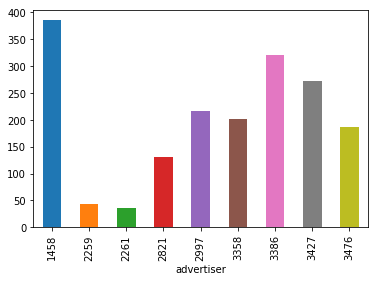

In [23]:
table2.Clicks.plot(kind ='bar')
table2.to_csv('tabla_train.csv')

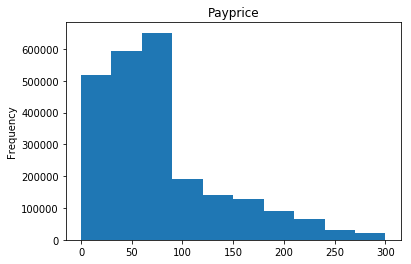

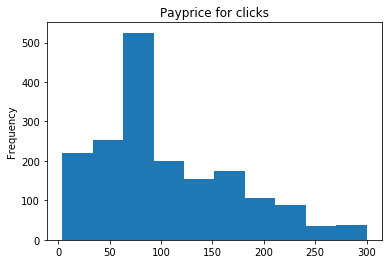

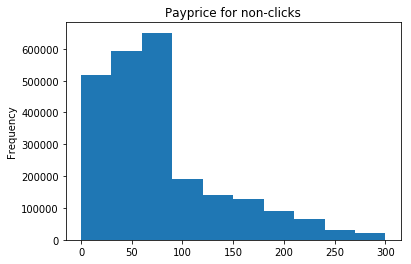

In [33]:
import matplotlib.pyplot as plt

payprice = row_train['payprice']
payprice_1 = row_train.payprice[row_train['click']==1]
payprice_0 = row_train.payprice[row_train['click']==0]
payprice.plot(kind = 'hist', title ='Payprice')
#plt.set_title('Payprice')
plt.show()
payprice_1.plot(kind = 'hist',title ='Payprice for clicks')
plt.show()
payprice_0.plot(kind = 'hist',title ='Payprice for non-clicks')
plt.show()

In [34]:
print("confidence interval for the payprice:[%6.4f - %6.4f]" % (np.percentile(payprice,2.5),np.percentile(payprice,97.5)))
print("confidence interval for the payprice for clicks:[%6.4f - %6.4f]" % (np.percentile(payprice_1,2.5),np.percentile(payprice_1,97.5)))
print("confidence interval for the payprice for clicks:[%6.4f - %6.4f]" % (np.percentile(payprice_0,2.5),np.percentile(payprice_0,97.5)))

confidence interval for the payprice:[5.0000 - 233.0000]
confidence interval for the payprice for clicks:[11.0000 - 262.0000]
confidence interval for the payprice for clicks:[5.0000 - 233.0000]


In [37]:
table3 = pd.crosstab(index=row_train['city'], columns=row_train['click'])
table3['Clicks']=table[1]
table3['Imps'] = pd.crosstab(index=row_train['city'], columns='counts')

#CTR: Click-Through Rate = #clicks / #imps advertise   (per Advertiser)
table3['CTR']=(table3[1]/table3['Imps'])*100

#Cost (per Advertiser)
table3['Cost'] = row_train['payprice'].groupby(row_train['city']).sum()/1000

#CPM: Cost per mille = chinese fen x 1000 (average)
table3['CPM'] = (1000*table3['Cost'])/table3['Imps']

#eCPC: effective Cost per Click
table3['eCPC']=table3['Cost']/(table3[1])

display(table3)

click,0,1,Clicks,Imps,CTR,Cost,CPM,eCPC
city,,,,,,,,
0,51745,43,NaN,51788,0.083031,3783.884,73.064880,87.997302
1,102304,84,NaN,102388,0.082041,7964.554,77.787963,94.816119
2,37666,29,NaN,37695,0.076933,2949.367,78.242923,101.702310
3,3977,1,NaN,3978,0.025138,313.008,78.684766,313.008000
4,23880,19,NaN,23899,0.079501,1882.656,78.775514,99.087158
5,11562,10,NaN,11572,0.086415,903.776,78.100242,90.377600
6,5428,7,NaN,5435,0.128795,423.702,77.958050,60.528857
7,8556,4,NaN,8560,0.046729,688.721,80.458061,172.180250
8,10005,8,NaN,10013,0.079896,763.194,76.220314,95.399250


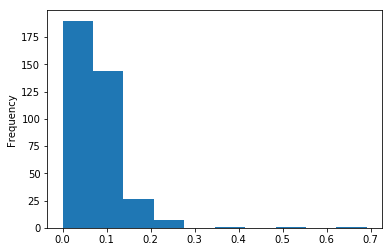

In [39]:
table3.CTR.plot(kind='hist')

In [41]:
table4 = pd.crosstab(index=row_train['weekday'], columns=row_train['click'])
table4['Clicks']=table4[1]
table4['Imps'] = pd.crosstab(index=row_train['weekday'], columns='counts')

#CTR: Click-Through Rate = #clicks / #imps advertise   (per Advertiser)
table4['CTR']=(table4[1]/table4['Imps'])*100

#Cost (per Advertiser)
table4['Cost'] = row_train['payprice'].groupby(row_train['weekday']).sum()/1000

#CPM: Cost per mille = chinese fen x 1000 (average)
table4['CPM'] = (1000*table4['Cost'])/table4['Imps']

#eCPC: effective Cost per Click
table4['eCPC']=table4['Cost']/(table4[1])

display(table4)

click,0,1,Clicks,Imps,CTR,Cost,CPM,eCPC
weekday,,,,,,,,
0,420684,271,271,420955,0.064377,32204.115,76.502512,118.834373
1,367915,249,249,368164,0.067633,30284.921,82.259322,121.626189
2,296152,286,286,296438,0.096479,23727.961,80.043588,82.964899
3,339344,283,283,339627,0.083327,25993.847,76.536456,91.851049
4,325754,264,264,326018,0.080977,25317.709,77.657396,95.900413
5,340395,247,247,340642,0.072510,27183.974,79.802179,110.056575
6,338944,193,193,339137,0.056909,25272.081,74.518796,130.943425


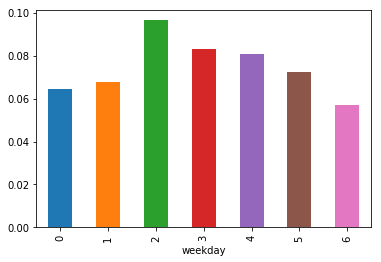

In [42]:
table4.CTR.plot(kind='bar')

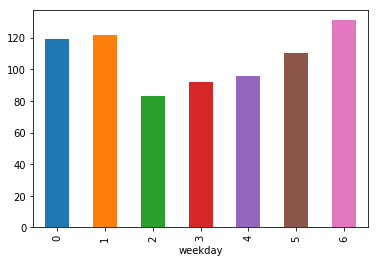

In [43]:
table4.eCPC.plot(kind='bar')

In [44]:
table5 = pd.crosstab(index=row_train['hour'], columns=row_train['click'])
table5['Clicks']=table5[1]
table5['Imps'] = pd.crosstab(index=row_train['hour'], columns='counts')

#CTR: Click-Through Rate = #clicks / #imps advertise   (per Advertiser)
table5['CTR']=(table5[1]/table5['Imps'])*100

#Cost (per Advertiser)
table5['Cost'] = row_train['payprice'].groupby(row_train['hour']).sum()/1000

#CPM: Cost per mille = chinese fen x 1000 (average)
table5['CPM'] = (1000*table5['Cost'])/table5['Imps']

#eCPC: effective Cost per Click
table5['eCPC']=table5['Cost']/(table5[1])

display(table5)

click,0,1,Clicks,Imps,CTR,Cost,CPM,eCPC
hour,,,,,,,,
0,177041,122,122,177163,0.068863,15471.504,87.329205,126.815607
1,60298,33,33,60331,0.054698,4227.596,70.073362,128.108970
2,34338,23,23,34361,0.066936,2280.849,66.379005,99.167348
3,33111,15,15,33126,0.045282,2249.421,67.904999,149.961400
4,18862,12,12,18874,0.063580,1295.398,68.633994,107.949833
5,19851,16,16,19867,0.080536,1403.856,70.662707,87.741000
6,23041,6,6,23047,0.026034,1717.970,74.542023,286.328333
7,46458,32,32,46490,0.068832,3576.111,76.922155,111.753469
8,69166,31,31,69197,0.044800,5559.487,80.342891,179.338290


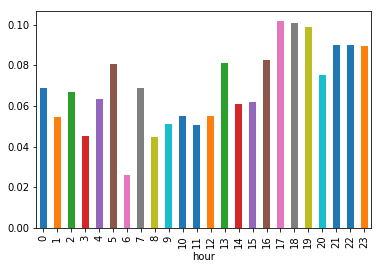

In [45]:
table5.CTR.plot(kind='bar')

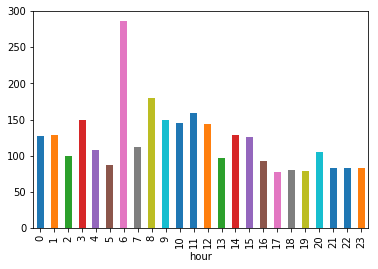

In [46]:
table5.eCPC.plot(kind='bar')

# BASIC BIDDING STRATEGIES

In [4]:
#LINEAR BIDDING STRATEGY

def bad_ctr(x):
    new = pd.crosstab(index=x, columns=row_train['click'])
    new['Clicks']=new[1]
    new['Imps'] = pd.crosstab(index=x, columns='counts')

    
#CTR: Click-Through Rate = #clicks / #imps advertise   (per Advertiser)
    new['CTR']=(new[1]/new['Imps'])*100
    new['best']=new.CTR>=0.05
#hours.CTR.value_counts().plot(kind='bar')
    #display(new)
    #indexes = [index for index in (new) if new['best'][index] == False]
    indexes= new[new['best']==False]
    #print(type(indexes))
    return indexes.index.values



In [5]:
def clean_data(data):
    hours = bad_ctr(row_train['hour'])
    regions = bad_ctr(row_train['region'])
    days = bad_ctr(row_train['weekday'])
    #cities = bad_ctr(row_train['city'])
    slot_width = bad_ctr(row_train['slotwidth'])
    slot_height = bad_ctr(row_train['slotheight'])
    data.hour.drop(hours, axis=0)
    data.region.drop(regions, axis=0)
    data.weekday.drop(days, axis=0)
    #data.city.drop(cities, axis=0)
    data.slotwidth.drop(slot_width, axis=0)
    data.slotheight.drop(slot_height, axis=0)
    return data

In [6]:
#clean_train = clean_data(row_train)
#clean_val = clean_data(row_val)
#clean_test = clean_data(row_test)

In [6]:
def floorprice(num):
    if num==0: y = 0
    elif num>=1 and num <=10: y = 1
    elif num>=11 and num <=50: y = 2
    elif num>=51 and num <=100: y = 3
    else: y = 4
    return y

In [7]:
def trans_binario(data, row_train):
    n= data.shape[0]
    
    ope_sys_values = list(np.sort(row_train.useragent.unique()))
    region_values = list(np.sort(row_train.region.unique()))
    #city_values = list(np.sort(row_train.city.unique()))
    slotwidth_values = list(np.sort(row_train.slotwidth.unique()))
    slotheight_values = list(np.sort(row_train.slotheight.unique()))
    slotvisibility_values = list(np.sort(row_train.slotvisibility.unique()))
    slotformat_values = list(np.sort(row_train.slotformat.unique()))
    #usertag_values = list(row_train.usertag.unique())

    a = len(row_train.weekday.unique())
    b = len(row_train.hour.unique())
    c = len(ope_sys_values)
    d = len(region_values)
    #e = len(city_values)
    f = len(slotwidth_values)
    g = len(slotheight_values)
    h = len(slotvisibility_values)
    j = len(slotformat_values)
    k = 5
    #l = len(usertag_values)
    
    #x = np.zeros(shape=(n,a+b+c+d+e+f+g+h+j+k), dtype='bool')
    x = np.zeros(shape=(n,a+b+c+d+f+g+h+j+k), dtype='bool')

    for i in range(n):
        one = data.weekday[i]
        x[i,one]=1
        one = data.hour[i]
        x[i,a+one]=1
        one = ope_sys_values.index(data.useragent[i])
        x[i,a+b+one]=1
        one = region_values.index(data.region[i])
        x[i,a+b+c+one]=1
        #one = city_values.index(data.city[i])
        #one = adexchange_values.index(data.adexchange[i])
        #x[i,a+b+c+d+one]=1
        one = slotwidth_values.index(data.slotwidth[i])
        #x[i,a+b+c+d+e+one]=1
        x[i,a+b+c+d+one]=1
        one = slotheight_values.index(data.slotheight[i])
        #x[i,a+b+c+d+e+f+one]=1
        x[i,a+b+c+d+f+one]=1
        one = slotvisibility_values.index(data.slotvisibility[i])
        #x[i,a+b+c+d+e+f+g+one]=1
        x[i,a+b+c+d+f+g+one]=1
        one = slotformat_values.index(data.slotformat[i])
        #x[i,a+b+c+d+e+f+g+h+one]=1
        x[i,a+b+c+d+f+g+h+one]=1
        one = floorprice(data.slotprice[i])
        #x[i,a+b+c+d+e+f+g+h+j+one]=1
        x[i,a+b+c+d+f+g+h+j+one]=1
        #if data.usertag[i] in usertag_values:
        #    one = usertag_values.index(data.usertag[i])
        #    x[i,a+b+c+d+e+f+g+h+j+k+one]=1
        #else:
        #    x[i,-1]=1
        #break
    return x


In [8]:
x_train = trans_binario(row_train, row_train)
y_train = row_train['click']
x_val = trans_binario(row_val, row_train)
y_val = row_val['click']
x_test = trans_binario(row_test, row_train)




In [9]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_val = pd.DataFrame(x_val)
y_val = pd.DataFrame(y_val)
x_test = pd.DataFrame(x_test)


x_train.to_csv('x_train.csv', sep=',')
y_train.to_csv('y_train.csv', sep=',')
x_val.to_csv('x_val.csv', sep=',')
y_val.to_csv('y_val.csv', sep=',')
x_test.to_csv('x_test.csv', sep=',')

In [3]:
x_train = pd.read_csv('x_train.csv', sep=',')
y_train = pd.read_csv('y_train.csv', sep=',')
x_val = pd.read_csv('x_val.csv', sep=',')
y_val = pd.read_csv('y_val.csv', sep=',')
x_test = pd.read_csv('x_test.csv', sep=',')

In [12]:
x_train.shape

(2430981, 160)

In [13]:
x_val.shape

(303925, 160)

In [14]:
y_val.shape

(303925, 2)

In [10]:
# LOGISTIC REGRESSION
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)
prediction1 = clf_log.predict(x_val)
pred_proba1= clf_log.predict_proba(x_test)
accu_model_1 = accuracy_score(y_val, prediction1)
pred_proba2= clf_log.predict_proba(x_train)
pred_proba3= clf_log.predict_proba(x_val)

print('accuracy Logistic Regression: {}'.format(accu_model_1))

pred_lr_test = pd.DataFrame(pred_proba1)
pred_lr_test.to_csv('pred_lr_test.csv')
pred_lr_train = pd.DataFrame(pred_proba2)
pred_lr_train.to_csv('pred_lr_train.csv')
pred_lr_val = pd.DataFrame(pred_proba3)
pred_lr_val.to_csv('pred_lr_val.csv')
#RUN UNTIL HERE!

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy Logistic Regression: 0.9993353623426833


In [ ]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_tree.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_tree.score(x_val, y_val)))
pred_proba2 = clf_tree.predict_proba(x_test)
pred_proba2 = pd.DataFrame(pred_proba2)
pred_proba2.to_csv('pred_tree.csv') #save probability prediction of "x test"

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [ ]:
#KNEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_val, y_val)))
pred_proba3 = knn.predict_proba(x_test)
pred_proba3 = pd.DataFrame(pred_proba3)
pred_proba3.to_csv('pred_knn.csv') #save probability prediction of "x test"

In [ ]:
#LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_val, y_val)))
pred_proba4 = lda.predict_proba(x_test)
pred_proba4 = pd.DataFrame(pred_proba4)
pred_proba4.to_csv('pred_lda.csv') #save probability prediction of "x test"

In [7]:
#Gaussian MOdel
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_val, y_val)))
pred_proba5 = gnb.predict_proba(x_test)
pred_proba5 = pd.DataFrame(pred_proba5)
pred_proba5.to_csv('pred_gnb.csv') #save probability prediction of "x test"

ValueError: bad input shape (2430981, 2)

In [8]:
#Support Vector machine model
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_val, y_val)))
pred_proba6 = svm.predict_proba(x_test)
pred_proba6 = pd.DataFrame(pred_proba6)
pred_proba6.to_csv('pred_svm.csv') #save probability prediction of "x test"

ValueError: bad input shape (2430981, 2)

In [4]:
#Xboost classifier
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
print('Accuracy of xgboost classifier on training set: {:.2f}'
     .format(xgb.score(x_train, y_train)))
print('Accuracy of xgboost classifier on test set: {:.2f}'
     .format(xgb.score(x_val, y_val)))
pred_proba7 = xgb.predict_proba(x_test)
pred_proba7 = pd.DataFrame(pred_proba7)
pred_proba7.to_csv('pred_xgb.csv') #save probability prediction of "x test"

ModuleNotFoundError: No module named 'xgboost'

In [8]:
x_train.shape

(2430981, 160)

In [10]:
y_train.shape

(1215490, 2)

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder


# 弱分类器的数目
n_estimator = 10

# 将训练集切分为两部分，一部分用于训练GBDT模型，另一部分输入到训练好的GBDT模型生成GBDT特征，然后作为LR的特征。这样分成两部分是为了防止过拟合。
X_train, X_train_lr, y_train, y_train_lr = train_test_split(x_val, y_val, test_size=0.5)
# 调用GBDT分类模型。
grd = GradientBoostingClassifier(n_estimators=n_estimator)
# 调用one-hot编码。
grd_enc = OneHotEncoder()
# 调用LR分类模型。
grd_lm = LogisticRegression()


'''使用X_train训练GBDT模型，后面用此模型构造特征'''
grd.fit(X_train, y_train)

# fit one-hot编码器
grd_enc.fit(grd.apply(X_train)[:, :, 0])

''' 
使用训练好的GBDT模型构建特征，然后将特征经过one-hot编码作为新的特征输入到LR模型训练。
'''
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)
# 用训练好的LR模型多X_test做预测
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
# 根据预测结果输出
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
#NEURAL NETWORK
